In [1]:
import pandas as pd

In [2]:
data = {
    "Month" : ["Jan","Feb","Mar","Apr","May","Jun"],
    "Sales" : [10000,12000,19000,40000,19000,20000],
    "Profit" : [3000,2000,4000,17000,5000,7000]
}

df = pd.DataFrame(data)   #Two-dimensional, size-mutable, potentially heterogeneous tabular data.
print(df)

  Month  Sales  Profit
0   Jan  10000    3000
1   Feb  12000    2000
2   Mar  19000    4000
3   Apr  40000   17000
4   May  19000    5000
5   Jun  20000    7000


In [3]:
import matplotlib.pyplot as plt

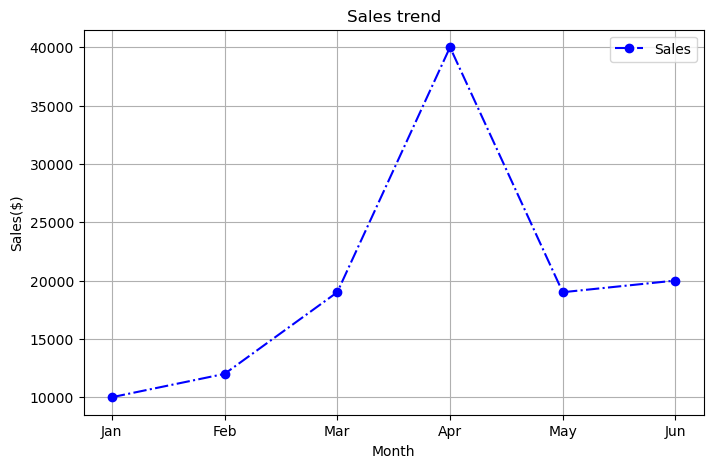

In [4]:
plt.figure(figsize=(8,5))
plt.plot(df['Month'],df["Sales"],color='blue',marker = 'o',ls='-.',label = 'Sales')

plt.title('Sales trend')
plt.xlabel('Month')
plt.ylabel('Sales($)')
plt.grid(True)
plt.legend()
plt.show()

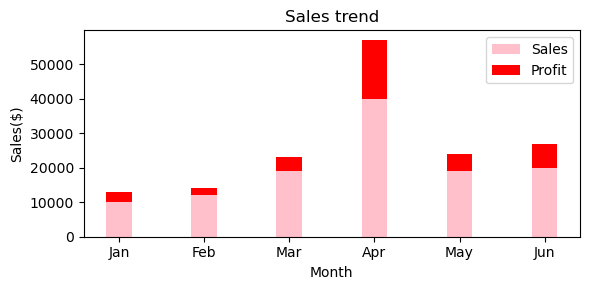

In [5]:
plt.figure(figsize=(6,3))
width = 0.3
plt.bar(df['Month'],df['Sales'],width = width,color='pink',label = 'Sales')
plt.bar(df['Month'],df['Profit'],width = width,color='red',label = 'Profit',bottom=df['Sales'])

plt.legend()
plt.title('Sales trend')
plt.xlabel('Month')
plt.ylabel('Sales($)')
plt.tight_layout()

plt.show()


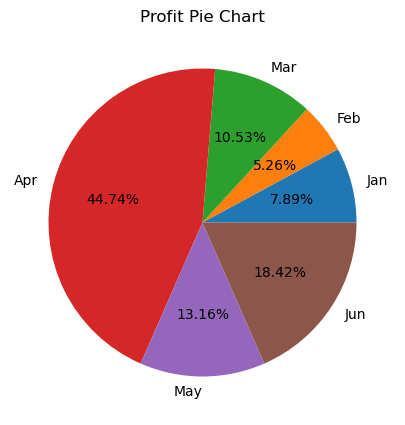

In [6]:
plt.figure(figsize=(10,5))
plt.pie(df['Profit'],labels= df['Month'],autopct='%1.2f%%')
plt.title("Profit Pie Chart")
plt.show()



#'%1.0f%%'	==> 12%, 46%
#'%1.1f%%'	==> 12.3%, 45.7%
#'%1.2f%%'	==> 12.34%, 45.67%

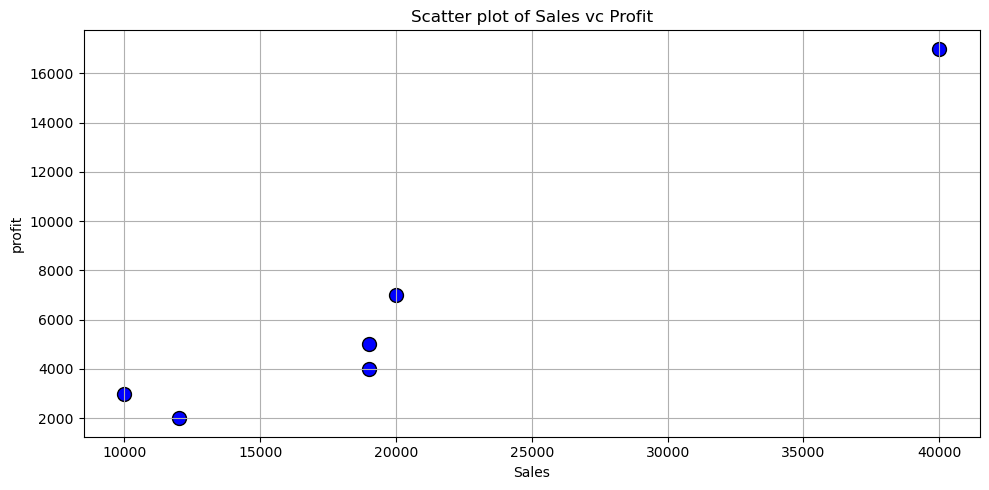

In [7]:
plt.figure(figsize=(10,5))
plt.scatter(df['Sales'],df['Profit'],color = 'blue',s = 100,edgecolors='black')
plt.title("Scatter plot of Sales vc Profit")
plt.xlabel('Sales')
plt.ylabel('profit')
plt.tight_layout()
plt.grid(True)
plt.show()

#plt.tight_layout() automatically adjusts the spacing between subplots, titles, axis labels, and tick labels 
#in your figure so that nothing overlaps or gets cut off.

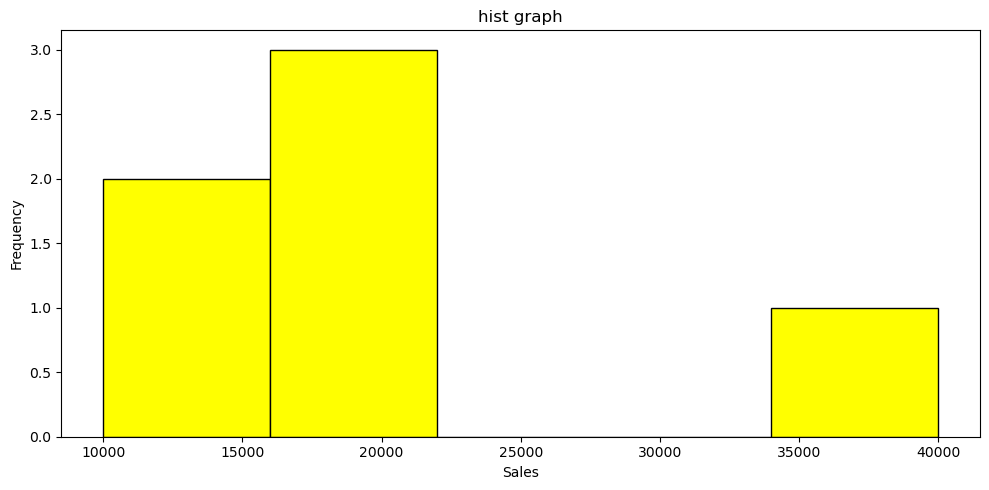

In [8]:
plt.figure(figsize=(10,5))
plt.hist(df['Sales'],bins=5,color='yellow',edgecolor='black')
plt.title('hist graph')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.grid(False)
plt.show()

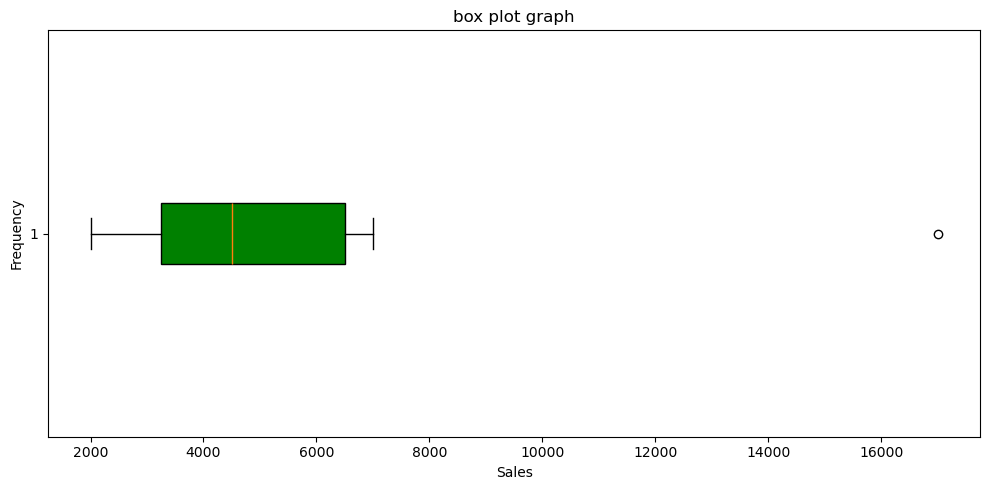

In [9]:
plt.figure(figsize=(10,5))
plt.boxplot(df['Profit'],vert=False,patch_artist=True,boxprops=dict(facecolor='green'))
plt.title('box plot graph')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.grid(False)
plt.show()

# vert=False makes it horizontal (the boxes lie flat along the x-axis).
# Setting patch_artist=True fills the box with color.
# boxprops lets you customize box appearance.

In [10]:
!pip install gradio

In [11]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = {
    "Month" : ["Jan","Feb","Mar","Apr","May","Jun"],
    "Sales" : [10000,12000,19000,40000,19000,20000],
    "Profit" : [3000,2000,4000,17000,5000,7000]
}

df = pd.DataFrame(data)   
print(df)

  Month  Sales  Profit
0   Jan  10000    3000
1   Feb  12000    2000
2   Mar  19000    4000
3   Apr  40000   17000
4   May  19000    5000
5   Jun  20000    7000


In [13]:
def generate_plot(plot_type):
    fig = plt.figure(figsize=(8,5))
    
    if plot_type == 'Line Plot':
        plt.plot(df['Month'],df["Sales"],color='blue',marker = 'o',ls='-.',label = 'Sales')
        plt.title('Sales trend')
        plt.xlabel('Month')
        plt.ylabel('Sales($)')
        plt.grid(True)
        plt.legend()

    elif plot_type == 'Stacked Bar':
        fig.set_size_inches(10,6)
        width = 0.3
        plt.bar(df['Month'],df['Sales'],width = width,color='pink',label = 'Sales')
        plt.bar(df['Month'],df['Profit'],width = width,color='red',label = 'Profit',bottom=df['Sales'])
        plt.legend()
        plt.title('Sales trend')
        plt.xlabel('Month')
        plt.ylabel('Sales($)')

    elif plot_type == 'Pie Chart':
        fig.set_size_inches(7,7)
        plt.pie(df['Profit'],labels= df['Month'],autopct='%1.2f%%')
        plt.title("Profit Pie Chart")
        plt.show()

    elif plot_type == 'Scatter Chart':
        plt.scatter(df['Sales'],df['Profit'],color = 'blue',s = 100,edgecolors='black')
        plt.title("Scatter plot of Sales vc Profit")
        plt.xlabel('Sales')
        plt.ylabel('profit')
        plt.grid(True)
        plt.show()

    elif plot_type == 'Histogram Chart':
        plt.hist(df['Sales'],bins=5,color='yellow',edgecolor='black')
        plt.title('hist graph')
        plt.xlabel('Sales')
        plt.ylabel('Frequency')

    elif plot_type == 'Box Plot':
        plt.boxplot(df['Profit'],vert=False,patch_artist=True,boxprops=dict(facecolor='green'))
        plt.title('box plot graph')
        plt.xlabel('Sales')
        plt.ylabel('Frequency')

    plt.tight_layout()
    return fig


# Gradio UI

demo = gr.Interface(
    fn = generate_plot,
    inputs = gr.Radio(['Line Plot','Stacked Bar','Pie Chart','Scatter Chart','Histogram Chart','Box Plot'],
                     label = 'Choose PLot type'),
    outputs = gr.Plot(label = 'Sales Data Visualizations'),
    title = 'Sales & Profits Visual insights',
    description = ' Choose the type to Visualize the data'
)
demo.launch()
    
    

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
